# **Objective**
The Handwritten Digit Recognition is the ability of the computers to recognize the human handwritten digits. With the help of the dataset, this allows the model to analyze and predict the outcome of the number fed into the model with various flavors of the handwriting available.


# **Data** **Source**
The datasets. load_digits() function helps to load and return the digit dataset. This classification contains data points, where each data point is an 8X8 image of a single digit.

# **Import** **Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Import** **Data**

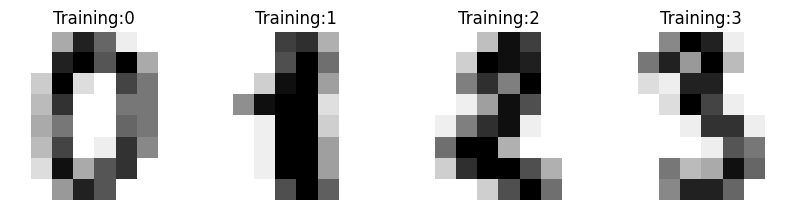

In [2]:
from sklearn.datasets import load_digits
df=load_digits()
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training:%i" %label)


# **Describe** **Data**
The digit dataset consists of 8*8 pixel images of digits. The images attribute of the dataset stores 8*8 arrays of grayscale values for each image.We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

## **Data Preprocessing**

In [4]:
df.images.shape

(1797, 8, 8)

In [5]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
df.images[0].shape

(8, 8)

In [7]:
len(df.images)

1797

In [8]:
n_samples=len(df.images)

In [9]:
data=df.images.reshape((n_samples,-1))

In [10]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

In [12]:
data.shape

(1797, 64)

# **Scaling Image** **Data**

In [13]:
data.min()

0.0

In [14]:
data.max()

16.0

In [15]:
data=data/16

In [16]:
data.min()

0.0

In [17]:
data.max()

1.0

In [18]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

# **Predict Test Data**

In [23]:
y_pred=rf.predict(X_test)
y_pred

array([9, 8, 7, 7, 4, 7, 5, 7, 9, 2, 2, 8, 9, 3, 6, 8, 5, 9, 2, 7, 2, 6,
       7, 0, 5, 0, 1, 5, 6, 3, 7, 8, 7, 6, 1, 5, 4, 3, 6, 2, 9, 0, 8, 9,
       8, 5, 4, 3, 3, 0, 3, 5, 6, 5, 0, 9, 7, 4, 1, 2, 8, 1, 9, 4, 2, 4,
       8, 6, 4, 4, 4, 0, 6, 8, 0, 4, 6, 9, 2, 0, 4, 2, 0, 5, 1, 1, 1, 5,
       2, 8, 5, 8, 1, 3, 6, 7, 3, 5, 5, 0, 5, 0, 5, 0, 4, 1, 1, 2, 8, 2,
       2, 3, 9, 2, 8, 4, 4, 6, 7, 1, 0, 9, 1, 7, 9, 3, 1, 1, 5, 8, 1, 4,
       3, 0, 0, 5, 8, 3, 5, 4, 9, 1, 8, 8, 6, 7, 7, 2, 6, 8, 7, 3, 2, 9,
       7, 4, 6, 0, 0, 8, 9, 4, 3, 3, 9, 6, 0, 3, 6, 8, 1, 8, 8, 4, 8, 8,
       3, 9, 4, 4, 2, 6, 6, 8, 5, 9, 3, 3, 7, 9, 6, 4, 7, 9, 2, 5, 3, 1,
       0, 0, 7, 2, 5, 5, 0, 4, 0, 3, 4, 7, 3, 5, 0, 0, 0, 6, 9, 0, 1, 5,
       2, 7, 4, 2, 2, 9, 8, 2, 3, 3, 7, 4, 8, 8, 8, 4, 2, 2, 2, 4, 8, 4,
       7, 5, 2, 3, 4, 5, 3, 8, 2, 1, 2, 2, 1, 1, 4, 4, 1, 2, 5, 4, 0, 7,
       5, 8, 9, 2, 5, 4, 1, 4, 1, 3, 7, 2, 8, 7, 5, 9, 3, 9, 6, 4, 3, 2,
       7, 3, 1, 7, 7, 0, 2, 9, 1, 5, 2, 1, 2, 2, 1,

# **Model Accuracy**

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[54,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 56,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  3,  1,  0,  0,  1,  0,  0, 49,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 58]])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.92      0.98      0.95        50
           2       0.98      0.98      0.98        52
           3       0.98      0.96      0.97        55
           4       0.96      0.98      0.97        53
           5       0.92      1.00      0.96        56
           6       1.00      0.96      0.98        51
           7       0.98      1.00      0.99        52
           8       0.94      0.91      0.92        54
           9       1.00      0.94      0.97        62

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

